# LD#2 Motora aizdedzes leņķa apsteidzes novērtējums

### Laboratorijas darba mērķi

- iepazīt dzirksteļaizdedzes motora aizdedzes sistēmas komponentes un to darbību;

- iegūt pieredzi motora izmēģināšanā uz jaudas stenda;

- uzzināt par aizdedzes apsteidzes leņķa ietekmi uz motora griezes momentu un lietderīgumu.


### Laboratorijas darba uzdevumi:
- uzstādīt un sagatavot darbam jaudas stenda kontroles sistēmu;

- sagatavot, iedarbināt un uzsildīt izmēģinājumu motoru;

- lietojot motora vadības sistēmu un jaudas stenda kontroles sistēmu, nostabilizēt motora apgriezienus un degmaisījuma sastāvu noteiktās robežās un reģistrēt motora vadības sistēmas un jaudas stenda darba parametrus;

- izmainīt aizdedzes apsteidzes leņķi, ar jaudas stenda kontroles sviru nostabilizēt motora apgriezienus un reģistrēt datus;

- atkārtot eksperimentu ar atšķirīgu degmaisījuma sastāvu. (Lambda 0.95; 1.0; 1.05)


### Reģistrējamie parametri:
1. Motora efektīvais griezes moments.
2. Aizdedzes apsteidzes leņķis.
3. Izplūdes gāzu temperatūra.
4. Degvielas patēriņš laika vienībā.


Sekojošais skripts importē *numpy* bibliotēku aprēķiniem, un *matplotlib* diagrammu veidošanai.

Tāpat tajā tiek ieviestas degvielas blīvuma $\rho$ un siltumspējas $Q_{LHV}$ mainīgie un izmēģinājumu režīmu parametru vērtības diagrammu veidošanas vajadzībām.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Ro=0.74
QLHV=44

Spark=[30,32,34,36,38,40,42]
Labels_Lambda=['$\lambda$=0.95','$\lambda$=1.00','$\lambda$=1.05']



Zemāk ir funkcijas kods, kurā tiek ielasīta informācija no *csv* faila attiecīgās sākuma rindas un kolonnas. 

Aprēķināta parametru vidējā vērtība izmēģinājumā.

Tad aprēķināta jauda, degvielas masas patēriņš, īpatnējais patēriņš un lietderības koeficients. 

Jauda:

$$P=\frac{T \cdot N \cdot 2 \cdot \pi \cdot 1000}{60}$$ 

kur

   T - griezes moments, $Nm$

   N - apgriezieni, $min^ {-1}$
   
   
Degvielas masas plūsma:

$$ m_f=v_f \cdot \rho \cdot 1000 $$

kur

$v_f$ - degvielas tilpuma plūsma, l/h

$\rho$ - blīvums, $m^3/kg$

Īpatnējais degvielas patēriņš:

$$sfc=\frac {m_f}{P}$$

Lietderības koeficients:

$$n_f=\frac {3600 \cdot 100}{sfc \cdot Q_{LHV}}$$



In [13]:
def lab_2_function (file, Ro, QLHV):
    
    import numpy as np

    RPM = np.loadtxt(file, dtype=float, delimiter=';', skiprows=1, usecols=1)
    RPM_m=np.mean(RPM)

    EGT = np.loadtxt(file, dtype=float, delimiter=';', skiprows=1, usecols=21)
    EGT_m=np.mean(EGT)

    LH = np.loadtxt(file, dtype=float, delimiter=';', skiprows=1, usecols=30)
    LH_m=np.mean(LH)

    T = np.loadtxt(file, dtype=float, delimiter=';', skiprows=1, usecols=31)
    T_m=np.mean(T)

    P=RPM_m*2*np.pi/60*T_m/1000

    mf=LH_m*Ro*1000

    sfc=mf/P
    nf=3600*100/(sfc*QLHV)
    
    return EGT_m, T_m, P, sfc, nf

Turpinājumā kods, kurā ielādē datus no izmēģinājuma režīmā ar $\lambda = 0.95$, aprēķina izplūdes gāzes (EGT), griezes momenta, jaudas, īpatnējā degvielas patēriņa un lietderības koeficienta vērtības.

In [14]:
files_L095=['L0.95_SA30.csv','L0.95_SA32.csv','L0.95_SA34.csv','L0.95_SA36.csv','L0.95_SA38.csv','L0.95_SA40.csv','L0.95_SA42.csv']


size=len(files_L095)

EGT_095=np.zeros(size)
T_095=np.zeros(size)
P_095=np.zeros(size)
sfc_095=np.zeros(size)
nf_095=np.zeros(size)

for ii in range (0,size): 

    EGTs, Ts, Ps, sfcs, nfs = lab_2_function (files_L095[ii], Ro, QLHV)
    EGT_095[ii]=EGTs
    T_095[ii]=Ts
    P_095[ii]=Ps
    sfc_095[ii]=sfcs
    nf_095[ii]=nfs

Turpinājumā kods, kurā ielādē datus no izmēģinājuma režīmā ar $\lambda = 1.0$, aprēķina izplūdes gāzes (EGT), griezes momenta, jaudas, īpatnējā degvielas patēriņa un lietderības koeficienta vērtības.

In [15]:
files_L1=['L1.0_SA30.csv','L1.0_SA32.csv','L1.0_SA34.csv','L1.0_SA36.csv','L1.0_SA38.csv','L1.0_SA40.csv','L1.0_SA42.csv']

size=len(files_L1)

EGT_1=np.zeros(size)
T_1=np.zeros(size)
P_1=np.zeros(size)
sfc_1=np.zeros(size)
nf_1=np.zeros(size)

for ii in range (0,size): 

    EGTs, Ts, Ps, sfcs, nfs = lab_2_function (files_L1[ii], Ro, QLHV)
    EGT_1[ii]=EGTs
    T_1[ii]=Ts
    P_1[ii]=Ps
    sfc_1[ii]=sfcs
    nf_1[ii]=nfs

Turpinājumā kods, kurā ielādē datus no izmēģinājuma režīmā ar $\lambda = 1.05$, aprēķina izplūdes gāzes (EGT), griezes momenta, jaudas, īpatnējā degvielas patēriņa un lietderības koeficienta vērtības.

In [16]:
files_L105=['L1.05_SA30.csv','L1.05_SA32.csv','L1.05_SA34.csv','L1.05_SA36.csv','L1.05_SA38.csv','L1.05_SA40.csv','L1.05_SA42.csv']

size=len(files_L105)

EGT_105=np.zeros(size)
T_105=np.zeros(size)
P_105=np.zeros(size)
sfc_105=np.zeros(size)
nf_105=np.zeros(size)

for ii in range (0,size): 

    EGTs, Ts, Ps, sfcs, nfs = lab_2_function (files_L105[ii], Ro, QLHV)
    EGT_105[ii]=EGTs
    T_105[ii]=Ts
    P_105[ii]=Ps
    sfc_105[ii]=sfcs
    nf_105[ii]=nfs    

Tālāk kods, kurā aprēķina vidējā efektīvā spiediena vērtību visos izmēģinājuma režīmos. Tas tiek paveikts, vienādojumā ievietojot griezes momenta vērtību skaitļu masīvu, kas satur vērtības ar 
visām aizdedzes apsteidzes leņķa vērtībām.

In [17]:
# BMEP aprēķins

B=81/1000
L=77/1000

Vd_mot=np.pi*B**2*L
BMEP_095=T_095*2*np.pi*2*10**(-5)/Vd_mot
BMEP_1=T_1*2*np.pi*2*10**(-5)/Vd_mot
BMEP_105=T_105*2*np.pi*2*10**(-5)/Vd_mot
    

Turpinājumā iegūta griezes momenta izmaiņu aizdedzes apsteidzes leņķa ietemē diagramma. Parādīti dati no visiem izmēģinājuma režīmiem. Diagrammā redzamais ir jāpaskaidro.

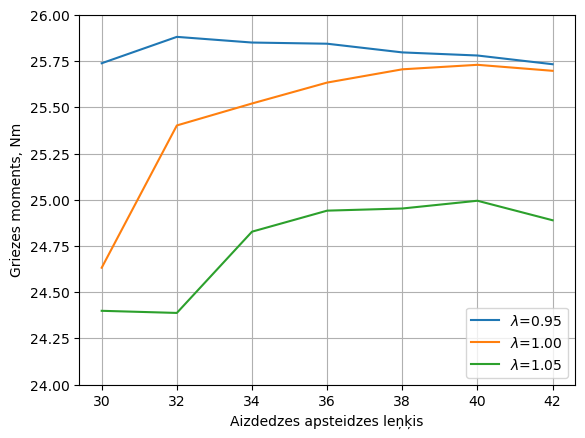

In [18]:
fig, ax = plt.subplots()
ax.grid()
ax.set_ylabel('Griezes moments, Nm')
ax.set_xlabel('Aizdedzes apsteidzes leņķis')

#aprēkina maksimālās un minimālās vērtības uz vert. ass.

maxval=np.max([np.max(T_095),np.max(T_1),np.max(T_105)])
minval=np.min([np.min(T_095),np.min(T_1),np.min(T_105)])

#pieskaita 0.4 un noapaļo uz veselu skaitli

ylim_1=np.round(minval-0.4,0)
ylim_2=np.round(maxval+0.4,0)


ax.set_ylim(ylim_1, ylim_2)

line1, = ax.plot(Spark,T_095)
line2, = ax.plot(Spark,T_1)
line3, = ax.plot(Spark,T_105)

ax.legend([line1, line2, line3], Labels_Lambda)

Lietojot iepriekšējā šūnā iekļauto kodu kā paraugu, jāizveido **motora jaudas un aizdedzes apsteidzes leņķa līnijas veida diagramma**. Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības.
 Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības. Uzrakstīt īsus secinājumus par novērojamo.

Lietojot iepriekšējā šūnā iekļauto kodu kā paraugu, jāizveido **īpatnējā degvielas patēriņa un aizdedzes apsteidzes leņķa līnijas veida diagramma**. Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības.
 Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības. Uzrakstīt īsus secinājumus par novērojamo.

Lietojot iepriekšējā šūnā iekļauto kodu kā paraugu, jāizveido **motora lietderības koeficienta un aizdedzes apsteidzes leņķa līnijas veida diagramma**. Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības.
 Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības. Uzrakstīt īsus secinājumus par novērojamo.

Lietojot iepriekšējā šūnā iekļauto kodu kā paraugu, jāizveido **izplūdes gāzu temperatūras un aizdedzes apsteidzes leņķa līnijas veida diagramma**. Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības.
 Vienā diagrammā iekļaut datus no visiem trīs izmēģinājuma režīmiem. Uz asīm norādīt mērvienības. Uzrakstīt īsus secinājumus par novērojamo.

Ziņojumu sagatavot *pdf* formātā. Var ar virtuālo printeri izdrukāt kā *pdf* iesniegt Ortus līdz norādītajam termiņam.